<a href="https://colab.research.google.com/github/nghiho112/color-accessibility-app/blob/model/Color_Classifier_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import pathlib
import matplotlib.pyplot as plt

In [ ]:
# Importing Tensorflow
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.15.0


In [ ]:
#install this one before put everything in .py file
!pip install git+https://github.com/tensorflow/docs # Use some functions from tensorflow_docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-62_eo2fq
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-62_eo2fq
  Resolved https://github.com/tensorflow/docs to commit b64768499123da8b2253a534277d62e20de3ec73
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2024.2.5.73858-py3-none-any.whl size=182442 sha256=d28c616b00c577e32969676a43cd176d5ade67e182907316f35535ddc16b9d7c
  Stored in directory: /tmp/pip-ephem-wheel-cache-zjt71gro/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
#might not need it (will be deleted)

#plotly used for plotting Interactive Graphs
!pip install plotly
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
#Loading data set
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import os

Mounted at /content/drive


In [64]:
data_path = '/content/drive/MyDrive/Color/final_data.csv'

if not os.path.exists(data_path):
  print("The path doesn't exist!")

dataset = pd.read_csv(data_path)
dataset

,red,green,blue,label
0,20,139,240,Blue
1,174,83,72,Brown
2,144,249,131,Green
3,168,25,156,Pink
4,30,182,136,Green
...,...,...,...,...
5047,26,26,26,Black
5048,27,27,27,Black
5049,28,28,28,Black
5050,29,29,29,Black


In [65]:
#preprocessing dataset

#To find whether null entries are present
dataset.isnull().sum()


#One-hot-encoding to convert categirical data int numerric data
dataset.label.unique()
dataset = pd.get_dummies(dataset, columns=['label'])
#dataset


#reorder
dataset.columns
dataset = dataset[['red', 'green', 'blue', 'label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]
print(dataset)

#split data into training and testing set
train_dataset = dataset.sample(frac=0.8, random_state=8) #train = 80%,  random_state = any int value means every time when you run your program you will get the same output for train and test dataset, random_state is None by default which means every time when you run your program you will get different output because of splitting between train and test varies within
test_dataset = dataset.drop(train_dataset.index) #remove train_dataset from dataframe to get test_dataset
print(train_dataset)

#split features: red-green-blue and labels
train_labels = pd.DataFrame([train_dataset.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T
#print(train_label)

test_labels = pd.DataFrame([test_dataset.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T




      red  green  blue  label_Red  label_Green  label_Blue  label_Yellow  \
0      20    139   240          0            0           1             0   
1     174     83    72          0            0           0             0   
2     144    249   131          0            1           0             0   
3     168     25   156          0            0           0             0   
4      30    182   136          0            1           0             0   
...   ...    ...   ...        ...          ...         ...           ...   
5047   26     26    26          0            0           0             0   
5048   27     27    27          0            0           0             0   
5049   28     28    28          0            0           0             0   
5050   29     29    29          0            0           0             0   
5051   30     30    30          0            0           0             0   

      label_Orange  label_Pink  label_Purple  label_Brown  label_Grey  \
0             

#Try decision tree + Random forest

In [ ]:
#normalize data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()

train_dataset_x = scaler.fit_transform(train_dataset)
train_dataset_x
test_dataset_x = scaler.transform(test_dataset)



Training Accuracy: 1.0000
Test Accuracy: 0.8079


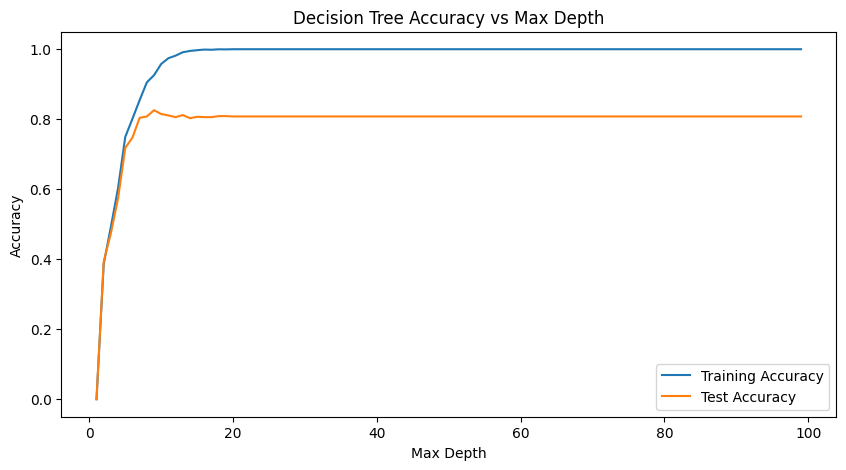

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt



max_depth_range = range(1, 100)  # Exploring tree depths from 1 to 20
train_accuracies = []
test_accuracies = []

for depth in max_depth_range:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(train_dataset, train_labels)

    # Training accuracy
    train_predictions = dt.predict(train_dataset)
    train_accuracy = accuracy_score(train_labels, train_predictions)
    train_accuracies.append(train_accuracy)

    # Test accuracy
    test_predictions = dt.predict(test_dataset)
    test_accuracy = accuracy_score(test_labels, test_predictions)
    test_accuracies.append(test_accuracy)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(max_depth_range, train_accuracies, label='Training Accuracy')
plt.plot(max_depth_range, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.legend()
plt.show()


In [79]:
from sklearn.metrics import classification_report

# You may need to binarize your labels and predictions if they're not already in binary indicator form

print(classification_report(test_labels, test_predictions))


              precision    recall  f1-score   support

           0       0.77      0.78      0.77        46
           1       0.90      0.90      0.90       305
           2       0.89      0.89      0.89       219
           3       0.79      0.70      0.74        60
           4       0.74      0.76      0.75        38
           5       0.75      0.78      0.76       107
           6       0.74      0.67      0.70       108
           7       0.76      0.81      0.78        63
           8       0.58      0.61      0.60        41
           9       0.76      1.00      0.87        13
          10       0.71      0.50      0.59        10

   micro avg       0.82      0.81      0.82      1010
   macro avg       0.76      0.76      0.76      1010
weighted avg       0.82      0.81      0.82      1010
 samples avg       0.81      0.81      0.81      1010



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



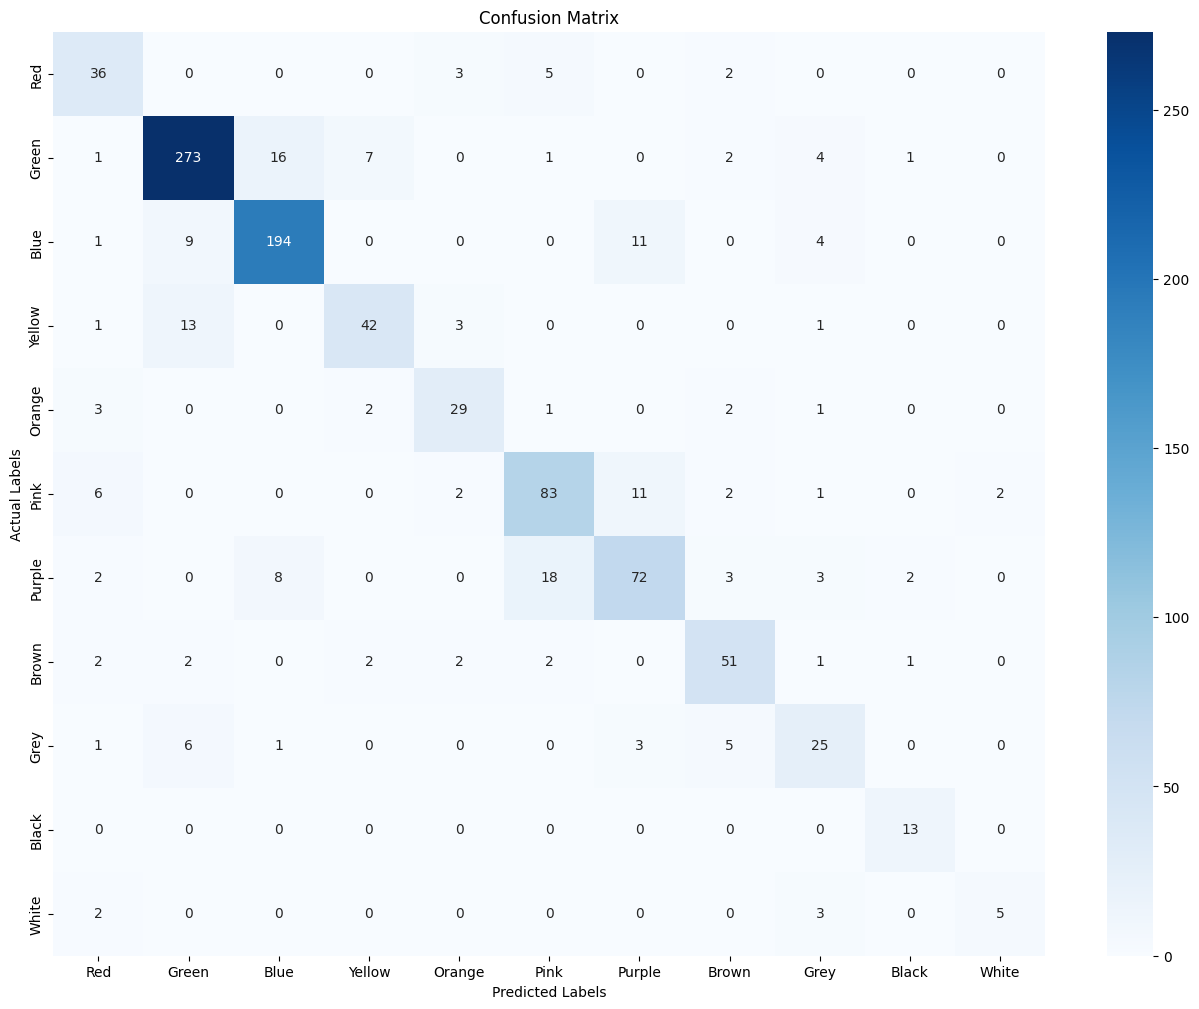

In [85]:
from sklearn.metrics import confusion_matrix, classification_report

# If test_labels and test_predictions are one-hot encoded, convert them to label-encoded
test_labels_label_encoded = np.argmax(test_labels.to_numpy(), axis=1)
test_predictions_label_encoded = np.argmax(test_predictions, axis=1)

# Now compute the confusion matrix with label-encoded data
confusion_matrix_test = confusion_matrix(test_labels_label_encoded, test_predictions_label_encoded)



f,ax = plt.subplots(figsize=(16,12))
categories = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
sns.heatmap(confusion_matrix_test, annot=True, cmap='Blues', fmt='d',
            xticklabels = categories,
            yticklabels = categories)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Ensure that train_dataset_x, train_labels, test_dataset_x, and test_labels are properly defined

# Parameter grid
param_grid = {

    'max_depth': [2, 3, 5, 10, 20, 30],

    'min_samples_leaf': [2, 3, 5, 10, 20, 50, 100],
    'criterion':['gini', 'entropy']
}

# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=4, n_jobs=-1, verbose=1, scoring='accuracy')

try:
    # Fit the model on the training data
    grid_search.fit(train_dataset, train_labels)

    # # Get the best parameters
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)

    # # Get the best model
    best_model = grid_search.best_estimator_

    # Predict on the test data
    rf_predictions = best_model.predict(test_dataset)

    # Calculate the accuracy
    rf_accuracy = accuracy_score(test_labels, rf_predictions)
    print("Decision Tree Accuracy:", rf_accuracy)

except Exception as e:
    print("Error occurred:", e)


Fitting 4 folds for each of 84 candidates, totalling 336 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5}
Decision Tree Accuracy: 0.8237623762376237


Training Accuracy: 0.9998
Test Accuracy: 0.8168


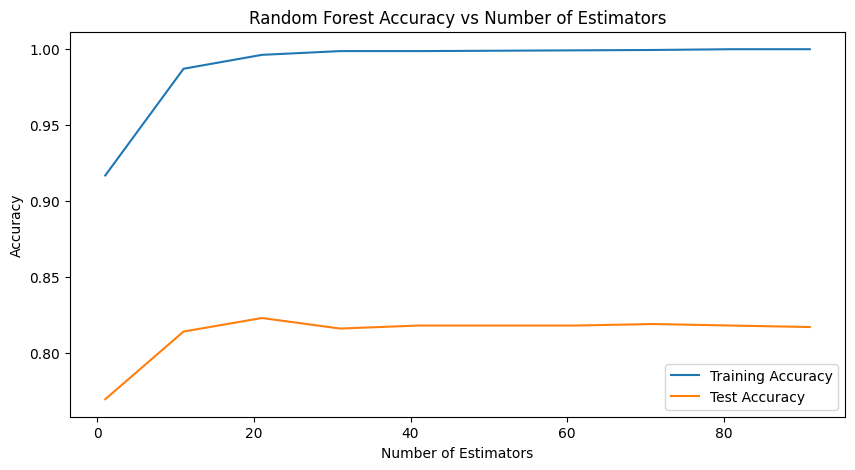

In [87]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



n_estimators_range = range(1, 101, 10)  # For example, 1 to 100 trees, stepping by 10
train_accuracies = []
test_accuracies = []

for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(train_dataset, train_labels)

    # Training accuracy
    train_predictions = rf.predict(train_dataset)
    train_accuracy = accuracy_score(train_labels, train_predictions)
    train_accuracies.append(train_accuracy)

    # Test accuracy
    test_predictions = rf.predict(test_dataset)
    test_accuracy = accuracy_score(test_labels, test_predictions)
    test_accuracies.append(test_accuracy)

    # Print accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_range, train_accuracies, label='Training Accuracy')
plt.plot(n_estimators_range, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs Number of Estimators')
plt.legend()
plt.show()


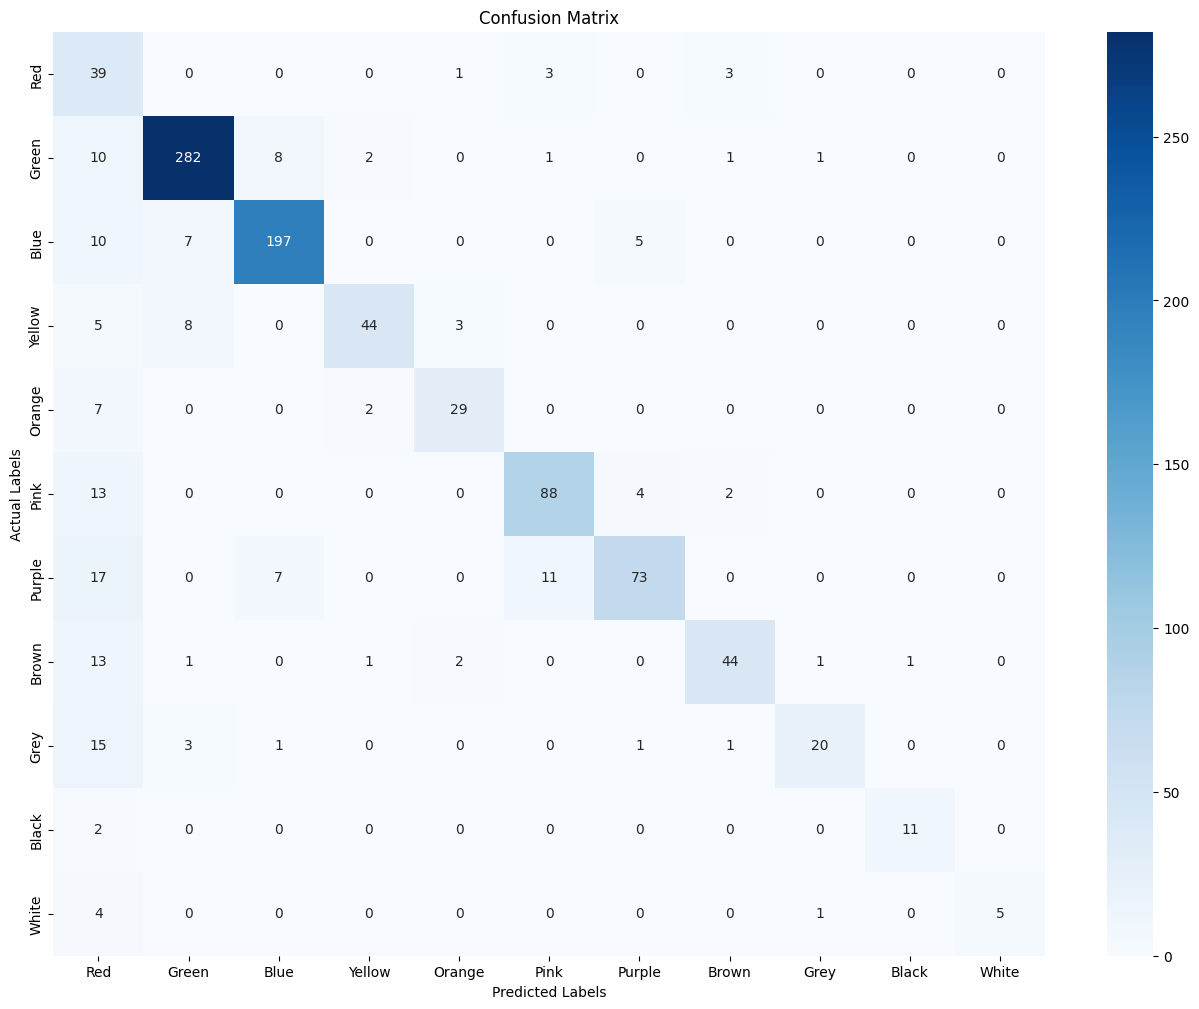

In [88]:
from sklearn.metrics import confusion_matrix, classification_report

# If test_labels and test_predictions are one-hot encoded, convert them to label-encoded
test_labels_label_encoded = np.argmax(test_labels.to_numpy(), axis=1)
test_predictions_label_encoded = np.argmax(test_predictions, axis=1)

# Now compute the confusion matrix with label-encoded data
confusion_matrix_test = confusion_matrix(test_labels_label_encoded, test_predictions_label_encoded)



f,ax = plt.subplots(figsize=(16,12))
categories = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
sns.heatmap(confusion_matrix_test, annot=True, cmap='Blues', fmt='d',
            xticklabels = categories,
            yticklabels = categories)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Ensure that train_dataset_x, train_labels, test_dataset_x, and test_labels are properly defined
bootstrap= [ True, False]
# Parameter grid
param_grid = {
    'max_depth': [5, 10, 20, 30, 50, 100],
    'min_samples_leaf': [1, 2, 4, 5, 6, 10],
    'max_features':['auto', 'sqrt', 'log2'],
    'criterion':['gini','entropy']

}

# Initialize the model
random_forest = RandomForestClassifier()

# Grid search
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

try:
    # Fit the model on the training data
    grid_search.fit(train_dataset, train_labels)

    # Get the best parameters
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Predict on the test data
    rf_predictions = best_model.predict(test_dataset)

    # Calculate the accuracy
    rf_accuracy = accuracy_score(test_labels, rf_predictions)
    print("Random Forest Accuracy:", rf_accuracy)

except Exception as e:
    print("Error occurred:", e)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1}
Random Forest Accuracy: 0.8247524752475247


#Save model

In [ ]:
#save model
#Install PyDrive library into Google Colab notebook
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

!pip install pyyaml h5py  # Required to save models in HDF5 format

# Save Model or weights on google drive and create on Colab directory in Google Drive

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('colormodel.keras')
model_file = drive.CreateFile({'title' : 'colormodel.keras'}) # colormodel_acu_  .h5 is the name of the model uploaded to Drive
model_file.SetContentFile('colormodel.keras')
model_file.Upload()



In [ ]:
!pip install joblib
import joblib

# Assuming 'model' is the variable containing your trained model
# Replace 'your_model.pkl' with the desired file name
joblib.dump(model, 'color.pkl')




['color.pkl']

In [ ]:
from google.colab import files

files.download('color.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# download to google drive
drive.CreateFile({'id': model_file.get('id')}) ### very important to run this last cell for loading the model in new notebook

GoogleDriveFile({'id': '1lNW-RjpGB0VAWjjMqAwK3H_IzVenJd4c'})

In [ ]:
#Load model from google drive into colab
file_obj = drive.CreateFile({'id': '1lNW-RjpGB0VAWjjMqAwK3H_IzVenJd4c'})
file_obj.GetContentFile('colormodel.keras') #colormodel_trained.h5 is the name of model uploaded to colab

In [ ]:
#will be remove in .py
ls #check for the saved model on googledrive

NameError: ignored

#Img testing cell

In [ ]:
import numpy as np
from PIL import Image

#load model to run prediction
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('colormodel.keras') #very important

# Load the image using PIL (Pillow)
image_path = '/content/drive/MyDrive/Color/test_set/Red_Rose.JPG'
image = Image.open(image_path)

# new_size = (10,10)
# image = image.resize(new_size)

plt.imshow(image) #remove in .py
plt.show()        #remove in .py

# Convert the image to a NumPy array
image_array = np.array(image)

# Extract the red, green, and blue channels into separate arrays
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

# Create a DataFrame with the red, green, and blue channels
import pandas as pd

image_df = pd.DataFrame({'red': red_channel.ravel(),
                         'green': green_channel.ravel(),
                         'blue': blue_channel.ravel()})

# Display the DataFrame
print(image_df)

#Predict the data:
predictions = model.predict(image_df)

#selecting class with highest confidence
actual_encoded_train_labels = np.argmax(train_labels.to_numpy(), axis=1) #train_labels were originally in one-hot

predicted_encoded_train_labels = np.argmax(predictions, axis=1)

predicted_encoded_train_labels = pd.DataFrame(predicted_encoded_train_labels, columns=['Labels'])
predicted_encoded_train_labels

predicted_encoded_train_labels.to_csv('predicted_labels.csv', index =False)


NameError: ignored